In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df1 = pd.read_csv("./data/df_final.csv")
df2 = pd.read_csv("./data/df_reorganizado.csv")

In [195]:
# GASTO TURÍSTICO TOTAL POR CCAA ENTRE 2019 Y 2025

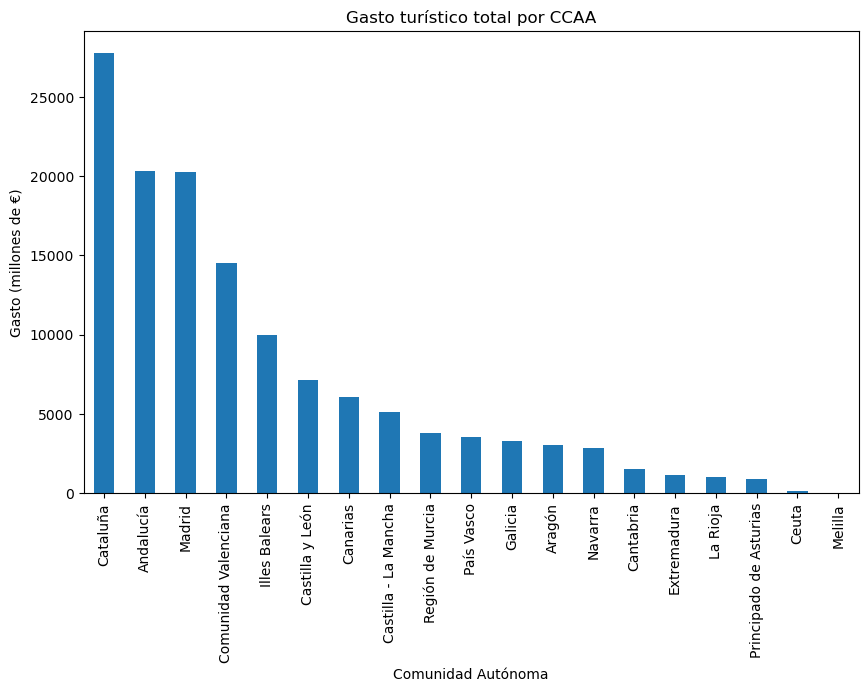

In [269]:
gasto_total = df1.groupby("CCAA")["Gasto"].sum().sort_values(ascending=False) / 1_000_000
gasto_total.plot(
    kind="bar",
    figsize=(10,6),
    title="Gasto turístico total por CCAA",
    ylabel="Gasto (millones de €)",
    xlabel="Comunidad Autónoma")
plt.savefig("grafico.png", dpi=155)
plt.show()

In [270]:
# TOP 5 COMUNIDADES MÁS EXPERIMENTLAES SEGÚN GASTO TURISTA

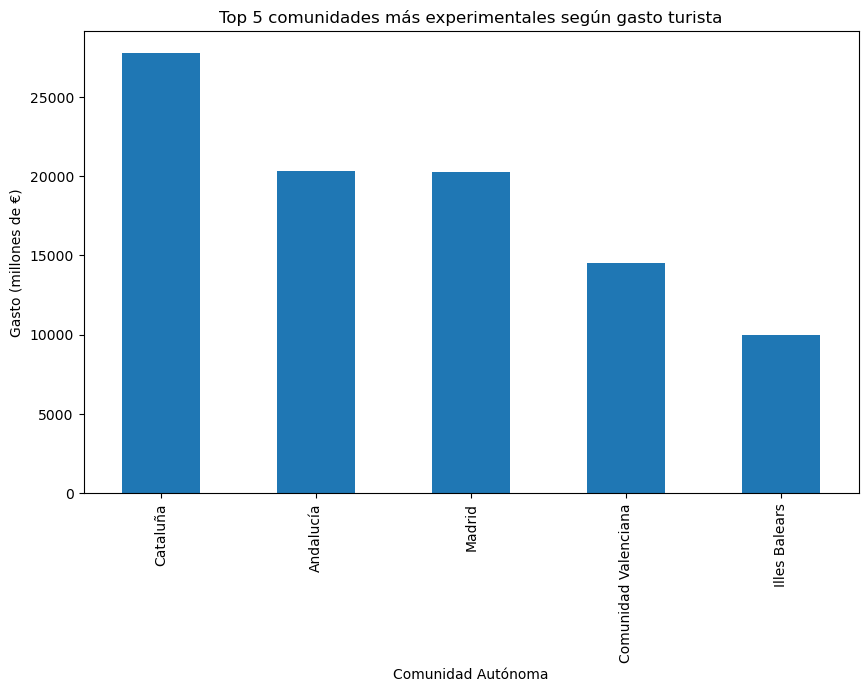

In [271]:
top5_gasto = gasto_total.head(5)
top5_gasto.plot(
    kind="bar",
    figsize=(10,6),
    title="Top 5 comunidades más experimentales según gasto turista",
    ylabel="Gasto (millones de €)",
    xlabel="Comunidad Autónoma")
plt.show()

In [272]:
# TUSITAS INTERNACIONALES Y NACIONALES POR COMUNIDADES ENTRE 2019 Y 2025

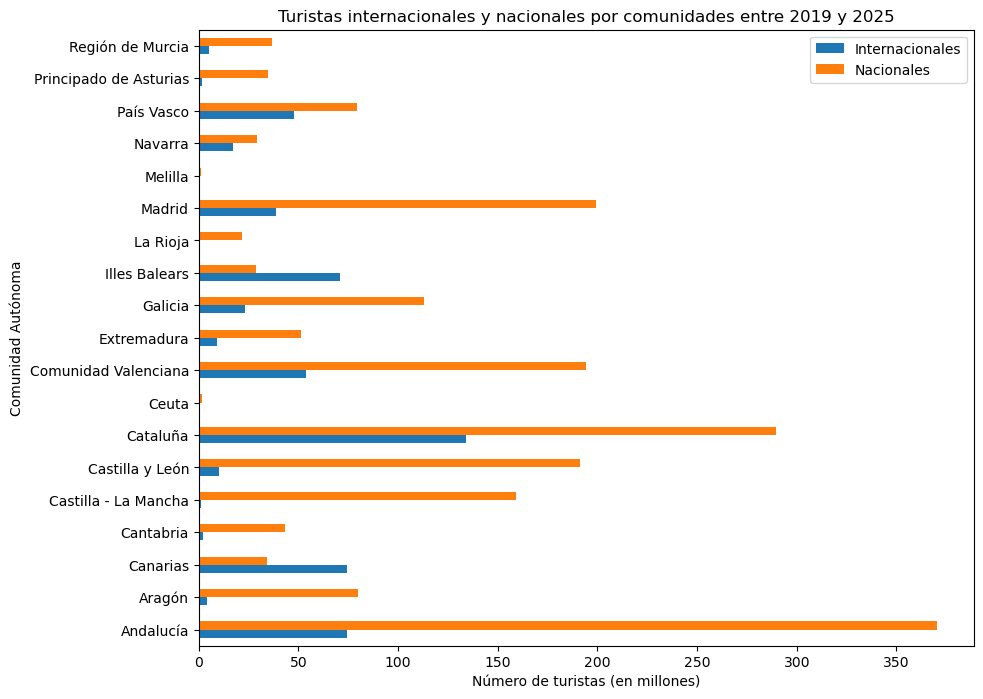

In [273]:
turistas_ccaa = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] = turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]] / 1_000_000
turistas_ccaa[["Turistas_Internacionales", "Turistas_Nacionales"]].plot(
    kind="barh",
    figsize=(10,8),
    title="Turistas internacionales y nacionales por comunidades entre 2019 y 2025",
    xlabel="Número de turistas (en millones)",
    ylabel="Comunidad Autónoma")
plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [274]:
# TOP 5 COMUNIDADES SEGÚN NÚMERO DE TURISTAS

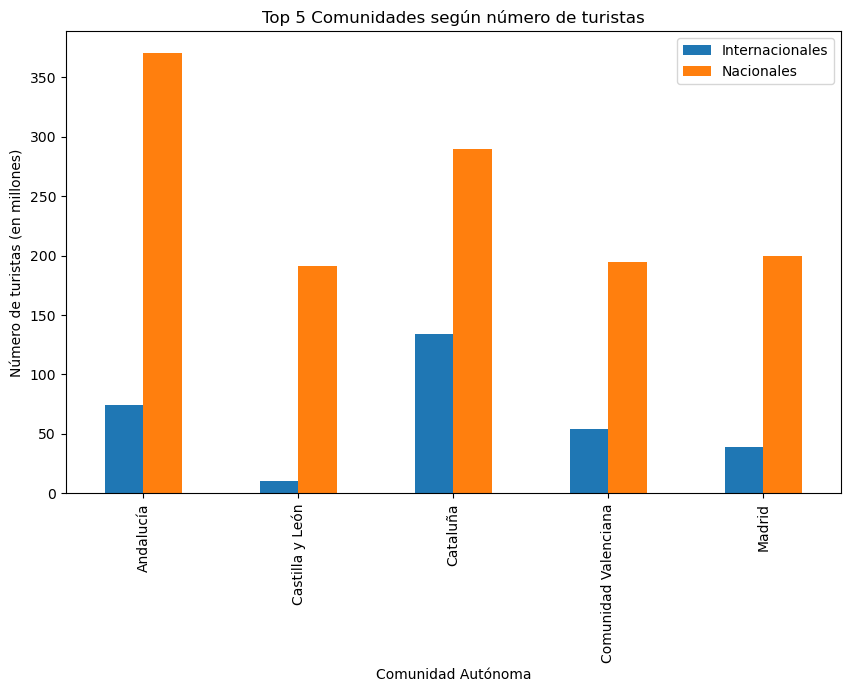

In [275]:
df_top5_ccaa = df1[df1["CCAA"].isin(top5_ccaa.index)]
ccaa_top5 = df_top5_ccaa.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()
ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]] = ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]] / 1_000_000
ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]].plot(
    kind="bar",
    figsize=(10,6),
    title="Top 5 Comunidades según número de turistas",
    ylabel="Número de turistas (en millones)",
    xlabel="Comunidad Autónoma")
plt.legend(["Internacionales", "Nacionales"])
plt.show()

In [276]:
# TOP 5 COMUNIDADES SEGÚN NÚMERO DE TURSITAS (ORDENADAS)

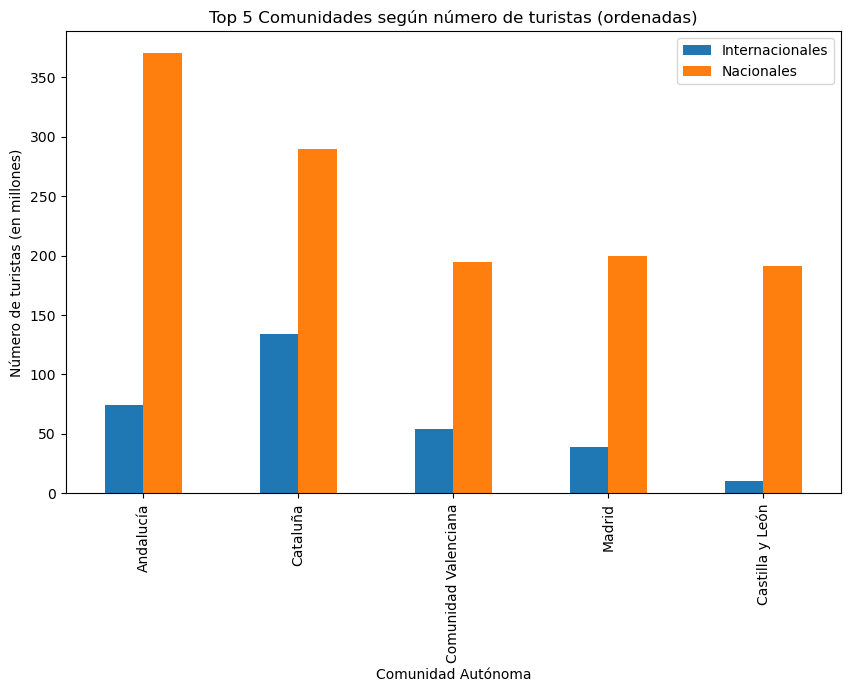

In [277]:
ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']] = ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']]
ccaa_top5['Turistas_Totales'] = ccaa_top5['Turistas_Internacionales'] + ccaa_top5['Turistas_Nacionales']
ccaa_top5 = ccaa_top5.sort_values(by='Turistas_Totales', ascending=False)
ccaa_top5[['Turistas_Internacionales', 'Turistas_Nacionales']].plot(
    kind='bar',
    figsize=(10,6),
    title="Top 5 Comunidades según número de turistas (ordenadas)",
    ylabel="Número de turistas (en millones)",
    xlabel="Comunidad Autónoma")

plt.legend(["Internacionales", "Nacionales"])
plt.savefig("grafico2.png", dpi=150) # GUARDAR GRÁFICO PARA LA PARTE 5
plt.show()

In [278]:
# DATOS TOTALES DE TURISMO POR TIPO DE TURISTAS EN GRÁFICO DE PASTEL

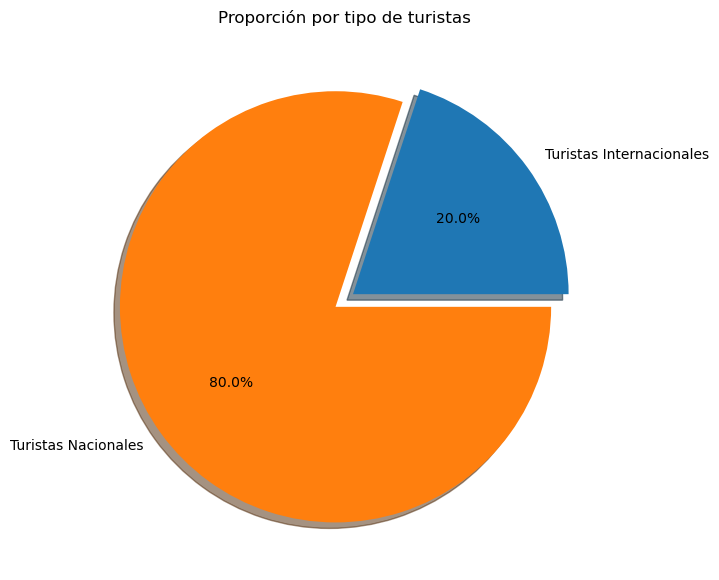

In [279]:
total_turistas = ccaa_top5[["Turistas_Internacionales", "Turistas_Nacionales"]].sum()
total_turistas.plot.pie(
    shadow=True,
    labels=["Turistas Internacionales", "Turistas Nacionales"],
    autopct="%1.1f%%",
    explode=[0.05, 0.05],
    figsize=(7,7))

plt.title("Proporción por tipo de turistas")
plt.show()

In [280]:
# GRÁFICO DE SUBPLOT PARA VER LAS 3 VARIABLES CON LAS QUE ESTAMOS TRABAJANDO ENTRE 2019 y 2025

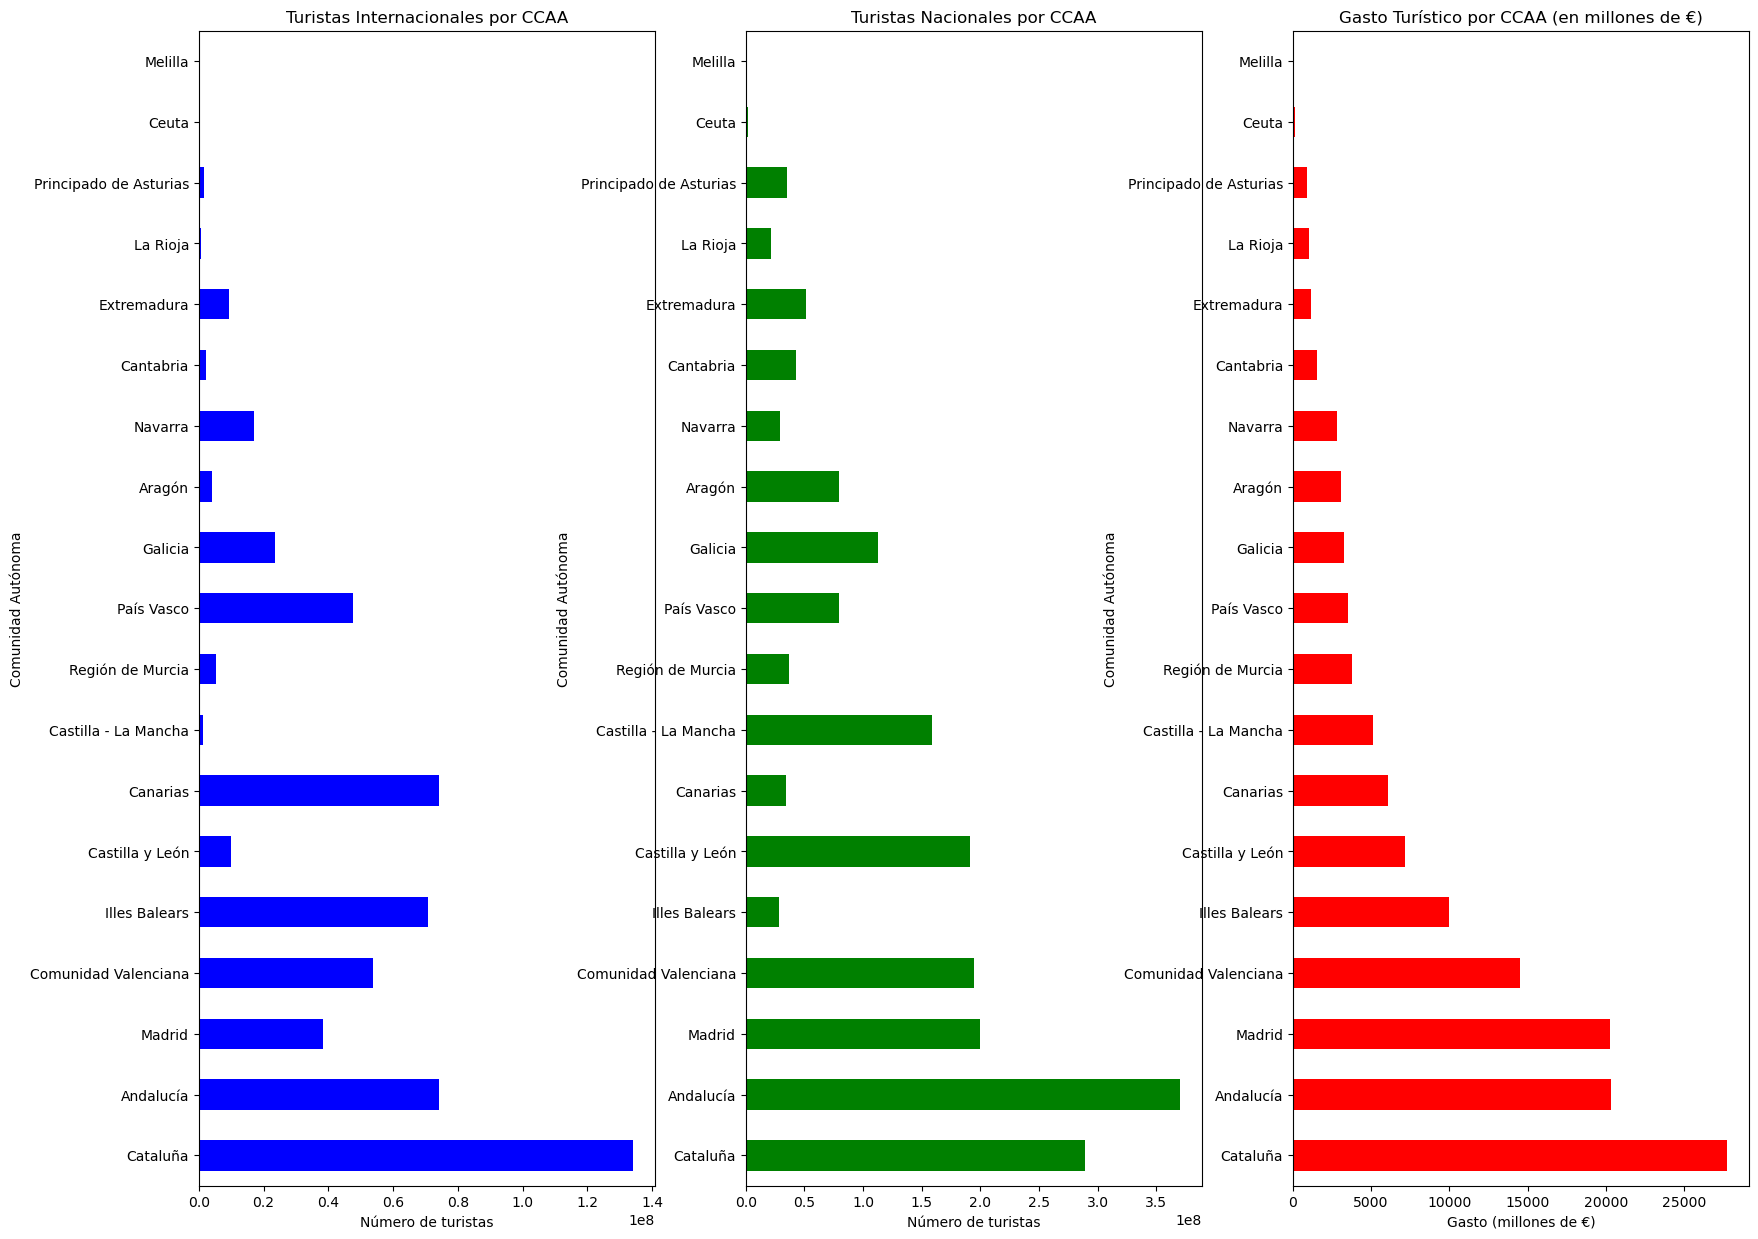

In [281]:
df_conjunta = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()

df_conjunta = df_conjunta.sort_values(by="Gasto", ascending=False)

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_conjunta["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_conjunta["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
(df_conjunta["Gasto"] / 1_000_000).plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en millones de €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (millones de €)")

plt.show()

In [209]:
# ORDEMOS CADA UNA DE MAYOR A MENOR

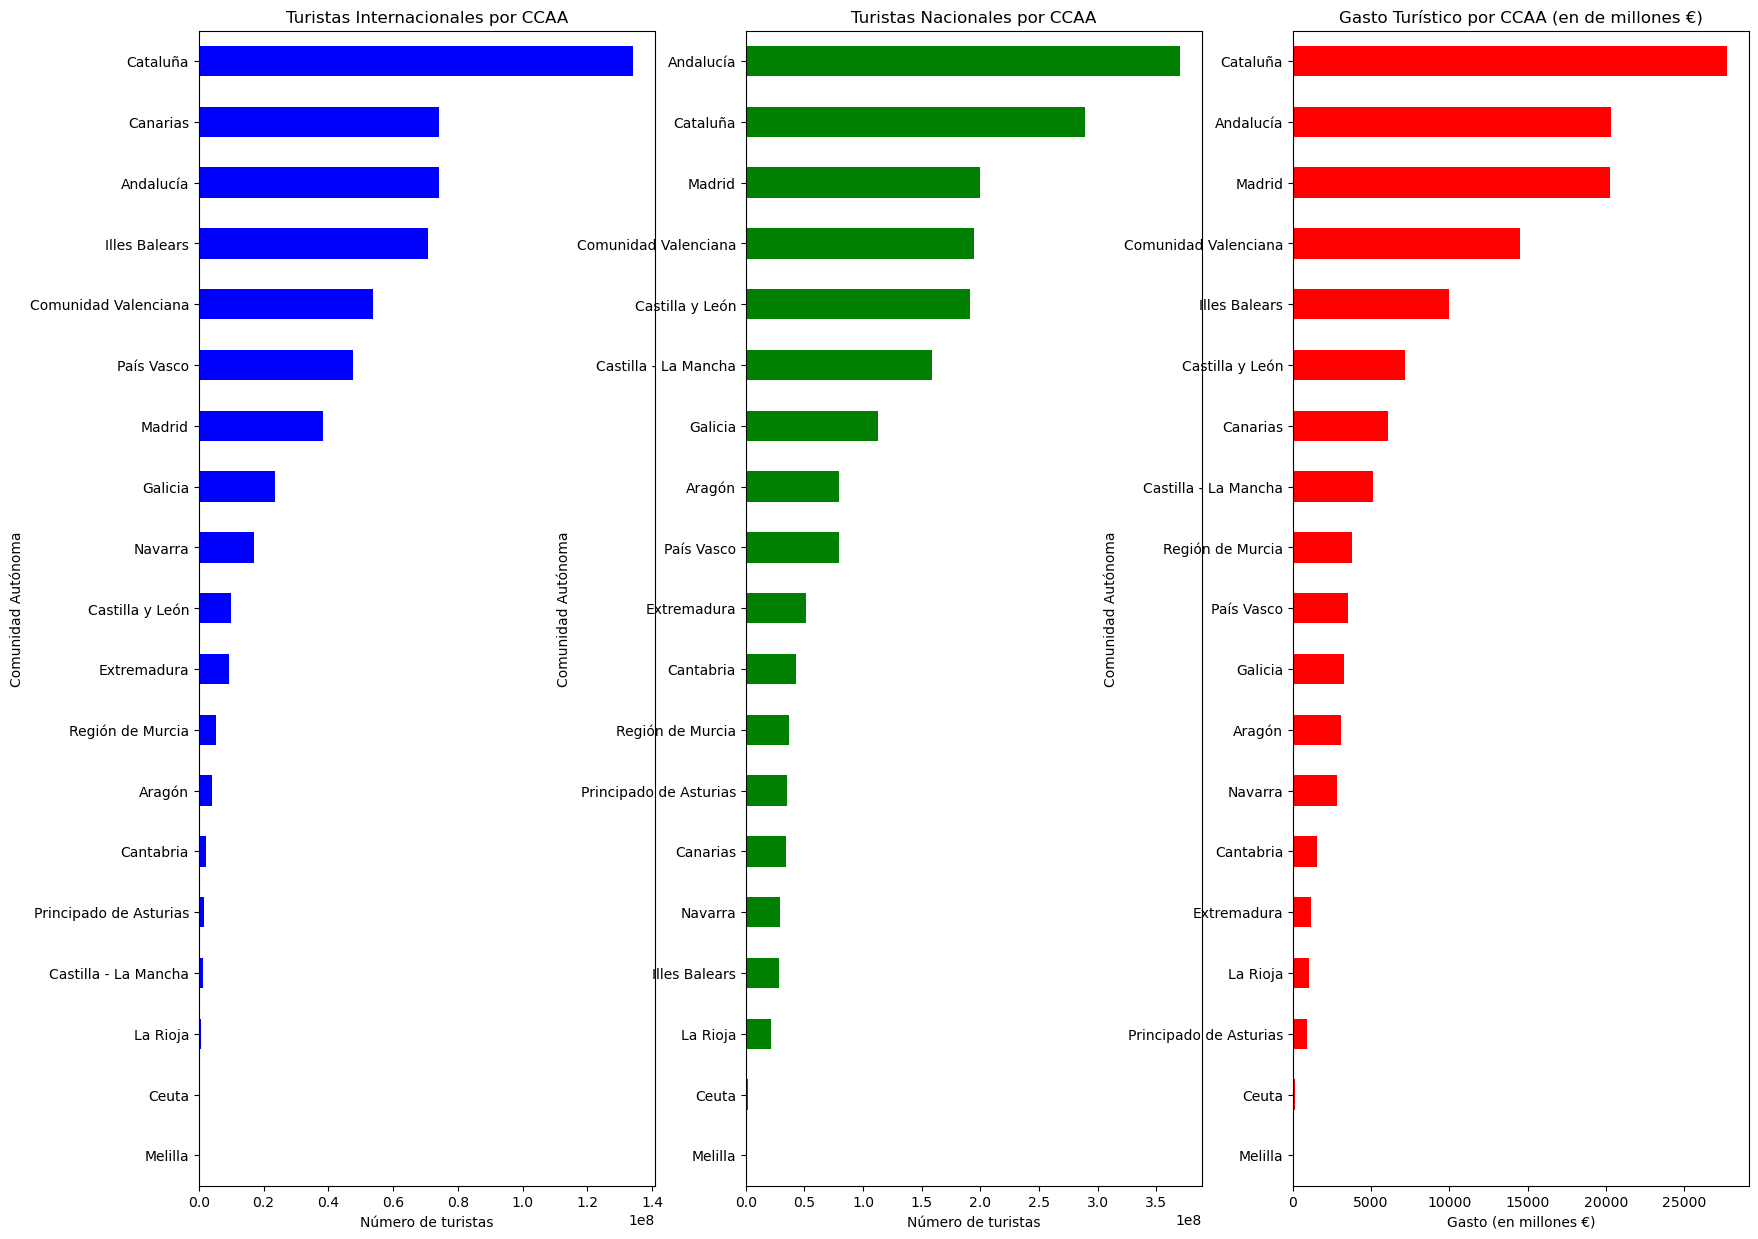

In [249]:
df_conjunta = df1.groupby("CCAA")[["Turistas_Internacionales", "Turistas_Nacionales", "Gasto"]].sum()

plt.figure(figsize=(20, 15))

plt.subplot(1, 3, 1)
df_conjunta_sorted = df_conjunta.sort_values(by="Turistas_Internacionales", ascending=True)  # ascending=True porque barras horizontales
df_conjunta_sorted["Turistas_Internacionales"].plot(kind="barh", color="blue")
plt.title("Turistas Internacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 2)
df_conjunta_sorted = df_conjunta.sort_values(by="Turistas_Nacionales", ascending=True)
df_conjunta_sorted["Turistas_Nacionales"].plot(kind="barh", color="green")
plt.title("Turistas Nacionales por CCAA")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Número de turistas")

plt.subplot(1, 3, 3)
df_conjunta_sorted = df_conjunta.sort_values(by="Gasto", ascending=True)
(df_conjunta_sorted["Gasto"] / 1_000_000).plot(kind="barh", color="red")
plt.title("Gasto Turístico por CCAA (en de millones €)")
plt.ylabel("Comunidad Autónoma")
plt.xlabel("Gasto (en millones €)")

plt.show()

In [211]:
# EVOLUCIÓN DE TURISTAS INTERNACIONALES EN 4 CCAA EN GRÁFICO DE LINEAS

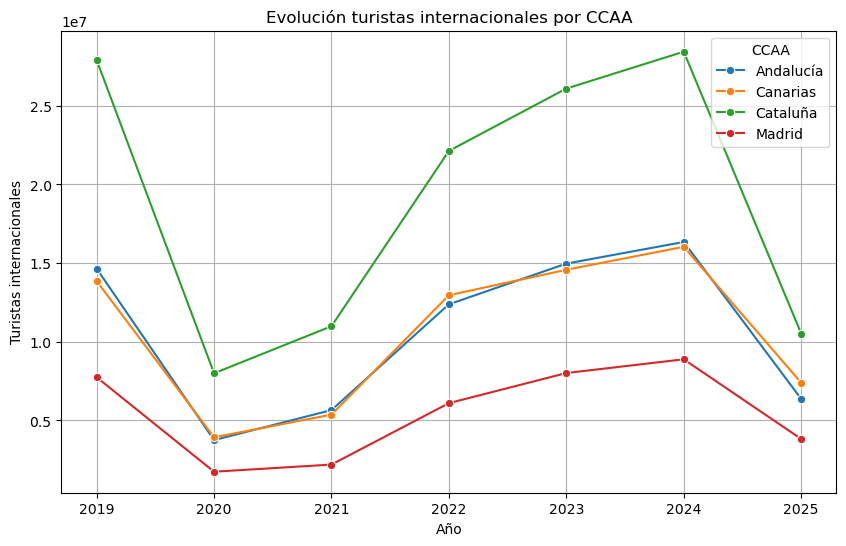

In [212]:
ccaa_elegidas = ["Andalucía", "Cataluña", "Madrid", "Canarias"]

df_lineas = df1[df1["CCAA"].isin(ccaa_elegidas)]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_lineas, x="Año", y="Turistas_Internacionales", hue="CCAA", marker="o")
plt.title("Evolución turistas internacionales por CCAA")
plt.ylabel("Turistas internacionales")
plt.grid(True)
plt.show()

In [251]:
# EVOLUCIÓN DE TURISTAS NACIONALES EN 4 CCAA EN GRÁFICO DE LINEAS

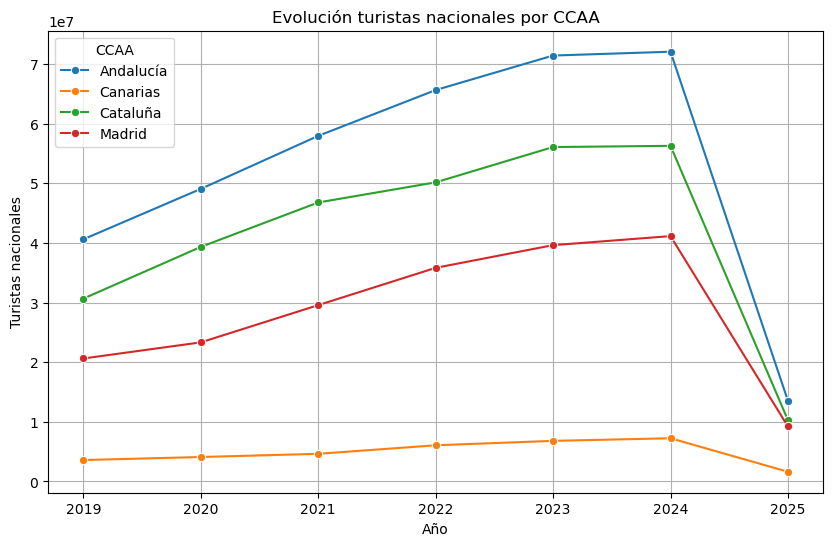

In [252]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_lineas, x="Año", y="Turistas_Nacionales", hue="CCAA", marker="o")
plt.title("Evolución turistas nacionales por CCAA")
plt.ylabel("Turistas nacionales")
plt.grid(True)
plt.show()

In [253]:
# HEATMAP DE CORRELACIONES

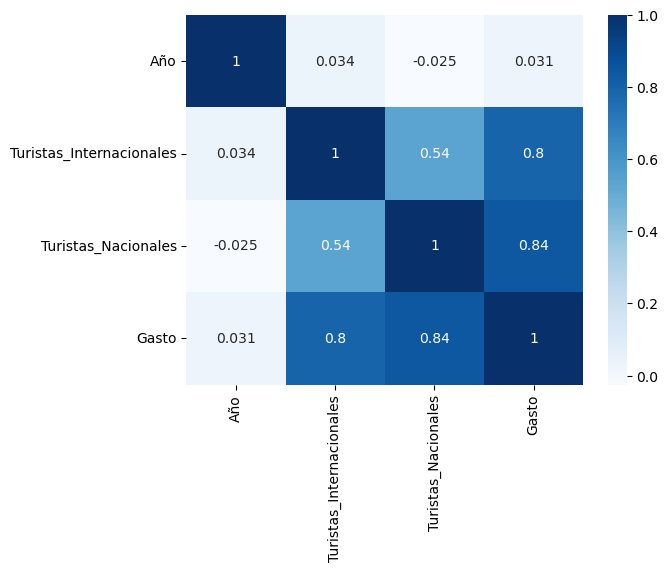

In [254]:
sns.heatmap(data = df1._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
df_AOD = pd.read_excel("../data/ACTIVIDADES_OCIO_DL.xlsx")


In [4]:
#Esta tabla tiene muchas lineas, y vamos a limpiar esta tabla.  

def limpieza(df_AOD):
#La idea es : encontrar si hay lineas duplicadas y eliminarlas
    nb_antes = len(df_AOD)
    df_AOD = df_AOD.drop_duplicates()
    nb_despues = len(df_AOD)
    nb_borrado = nb_antes - nb_despues

    if nb_borrado > 0:
        print(f"{nb_borrado} lineas duplicadas borradas")
    else:
        print("No habia duplicado")

# Tambien vamos a eliminar el "total nacional" ya que nos bloquea para hacer las sumas.
    df_AOD = df_AOD[~df_AOD["CCAA"].str.upper().eq("TOTAL NACIONAL")]
        
#Las columnas de años, mes, producto, provincia, visita pagina, gasto toal, y transacciones no nos interesan para responder a nuestra pregunta.`
        
    columnas_a_borrar = ["AÑO", "MES", "PRODUCTO", "PROVINCIA", "VISITAS_PAGINAS", "GASTO_TOTAL", "TRANSACCIONES"]
    columnas =[col for col in columnas_a_borrar if col in df_AOD.columns]
    df_AOD = df_AOD.drop(columns=columnas)
    


#ESTRUCTURACION
#Añado una columna para tener los beneficios para cada categoria. 
      
    if "ENTRADAS" in df_AOD.columns and "PRECIO_MEDIO_ENTRADA" in df_AOD.columns:
        df_AOD["BENEFICIOS"] = df_AOD["ENTRADAS"] * df_AOD["PRECIO_MEDIO_ENTRADA"]
        print("Columna beneficios añadida")

    if "CATEGORIA" in df_AOD.columns and "BENEFICIOS" in df_AOD.columns:
        df_groupado = df_AOD.groupby(["CCAA","CATEGORIA"]).agg({
            "ENTRADAS": "sum",
            "PRECIO_MEDIO_ENTRADA": "mean",
            "BENEFICIOS": "sum"
        }).reset_index()
# Clasifico del mas grande beneficios al mas pequeño. 
    df_groupado = df_groupado.sort_values("BENEFICIOS", ascending=False)

    return df_groupado

In [5]:
df_AOD = limpieza(df_AOD)

13 lineas duplicadas borradas
Columna beneficios añadida


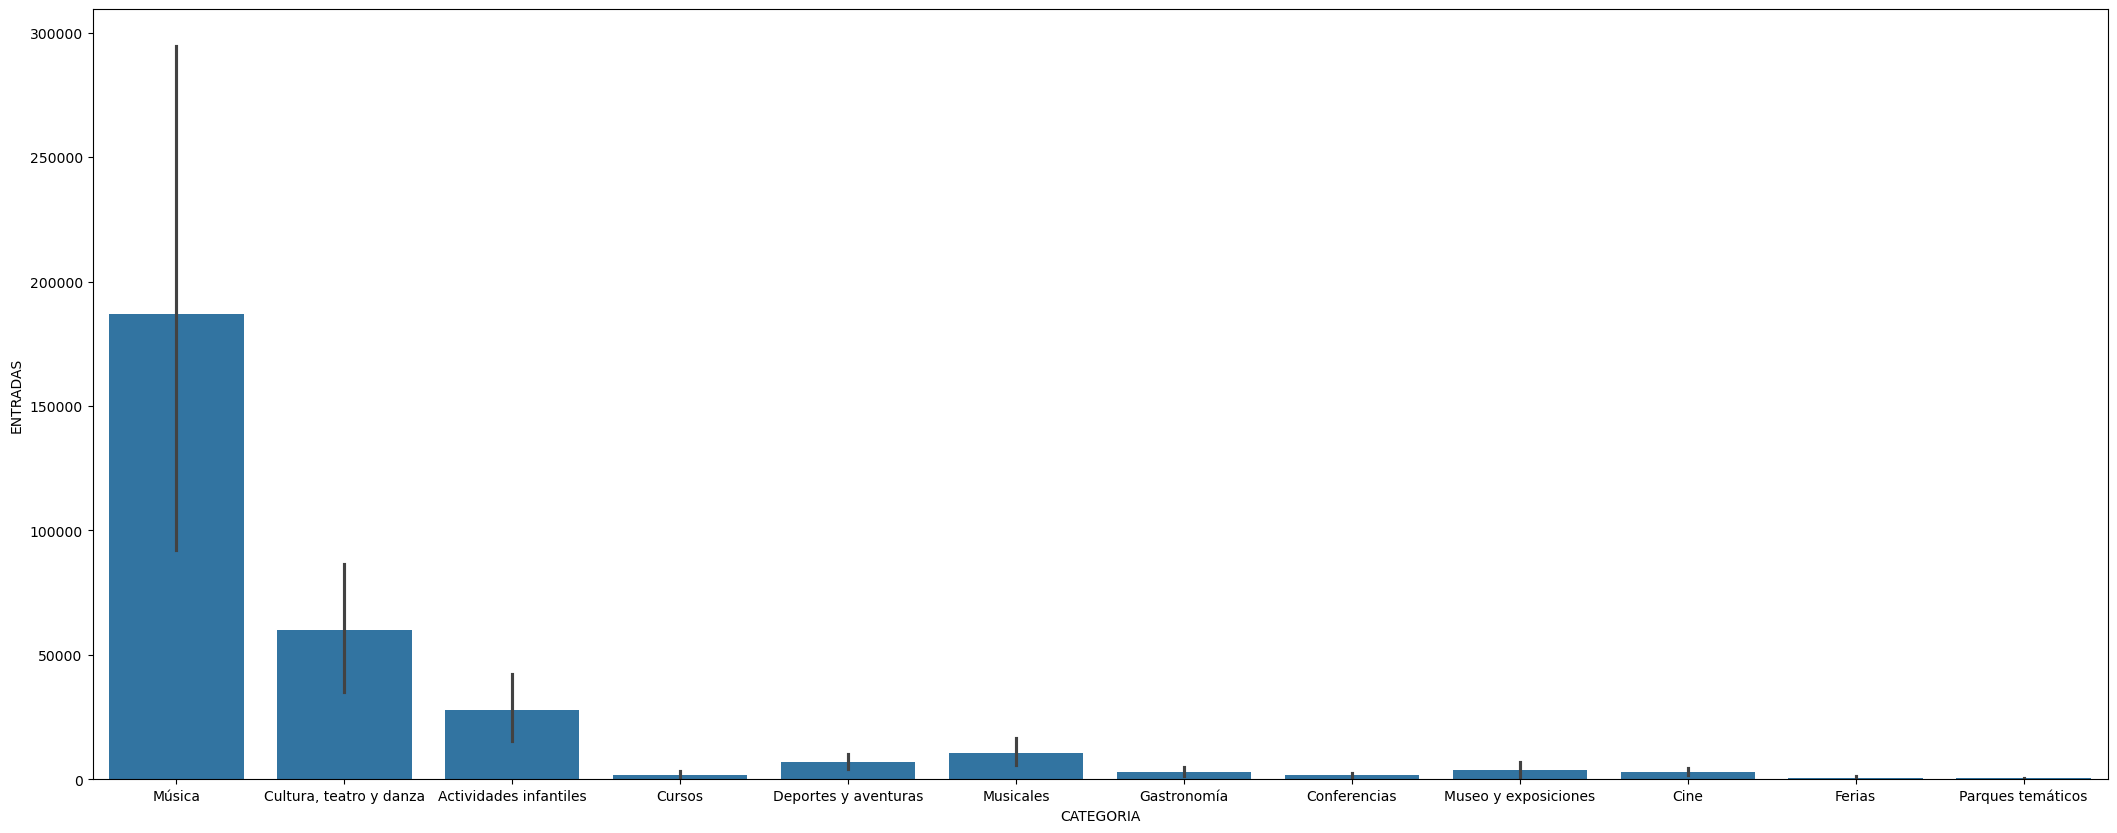

In [6]:
plt.figure(figsize = (26, 10))
sns.barplot(x = df_AOD["CATEGORIA"], y = df_AOD["ENTRADAS"], data = df_AOD)
plt.show()

Se nota que de las tres primeras categorias de actividades de ocio, se destacan : la musica, la danza, el teatro y la cultura y en tercero, las actividades infantiles. 

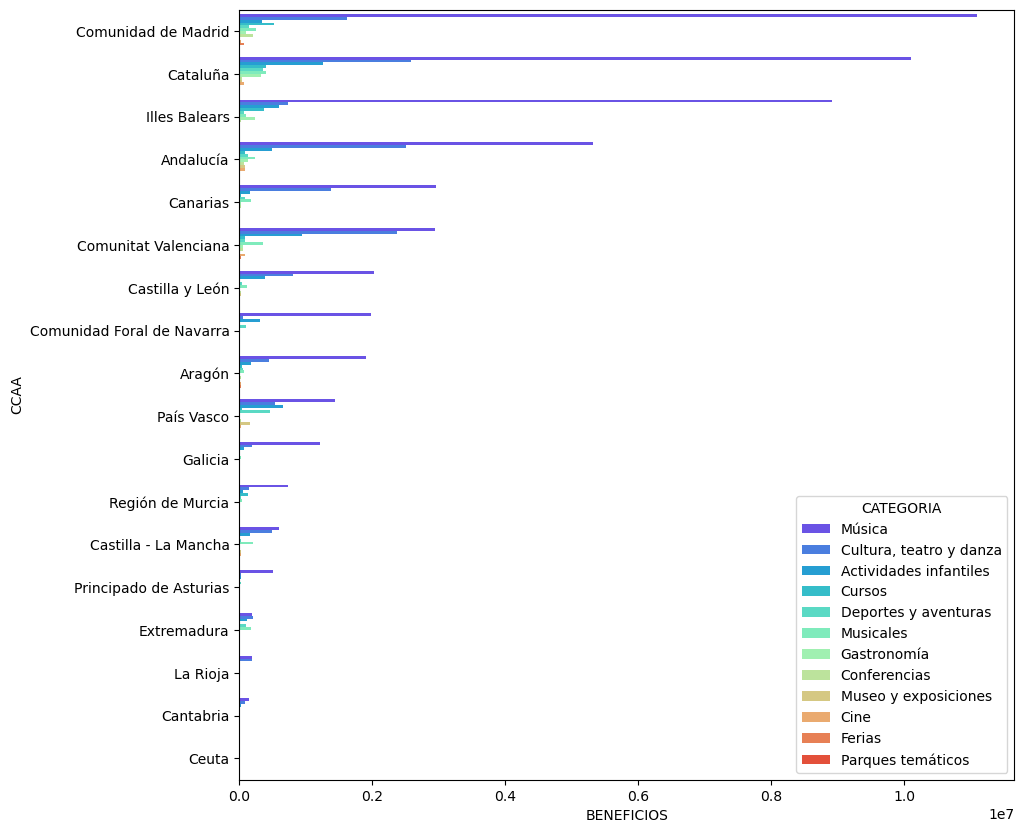

In [19]:

fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = "BENEFICIOS", y = "CCAA", hue = "CATEGORIA", data = df_AOD, palette = "rainbow")

plt.show()

Como lo hemos visto antes, la musica es la actividad de ocio que mas genera tantas entradas que beneficios. Las comunidades que generan mas beneficios son Madrid en primero, despues Catalunya y en tercero las islas baleares. 


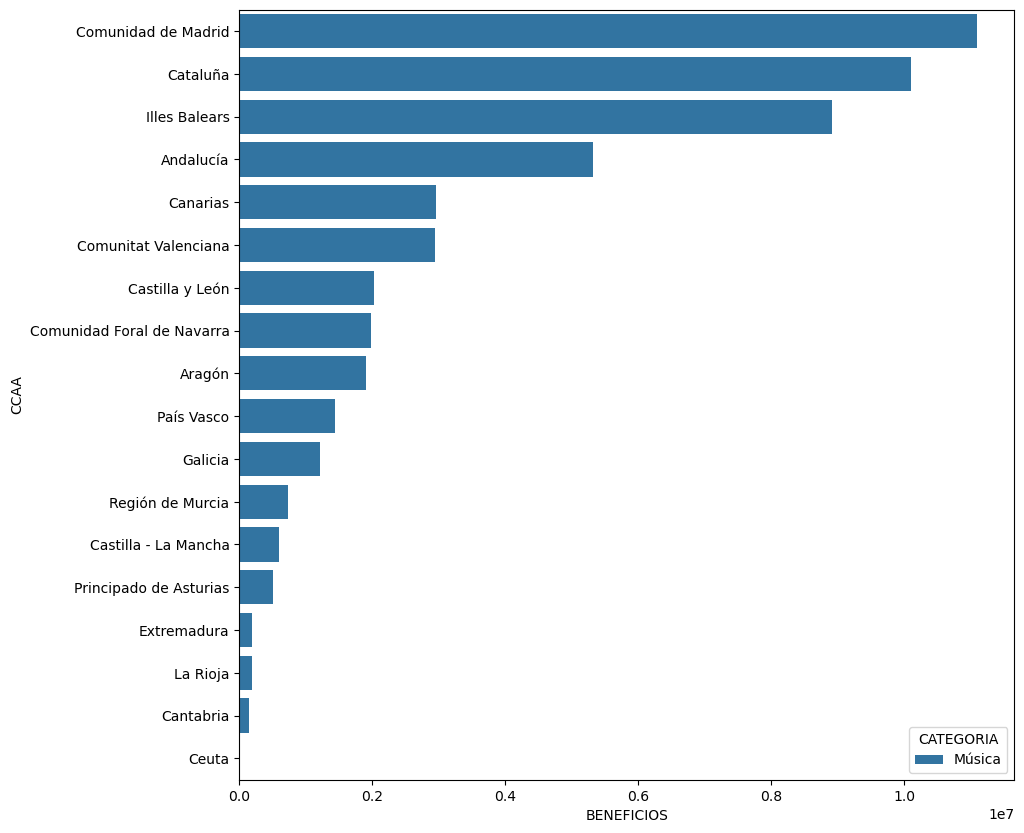

In [25]:
df_musica = df_AOD[df_AOD["CATEGORIA"] == "Música"]
fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = "BENEFICIOS", y = "CCAA", hue = "CATEGORIA", data = df_musica)

plt.show()

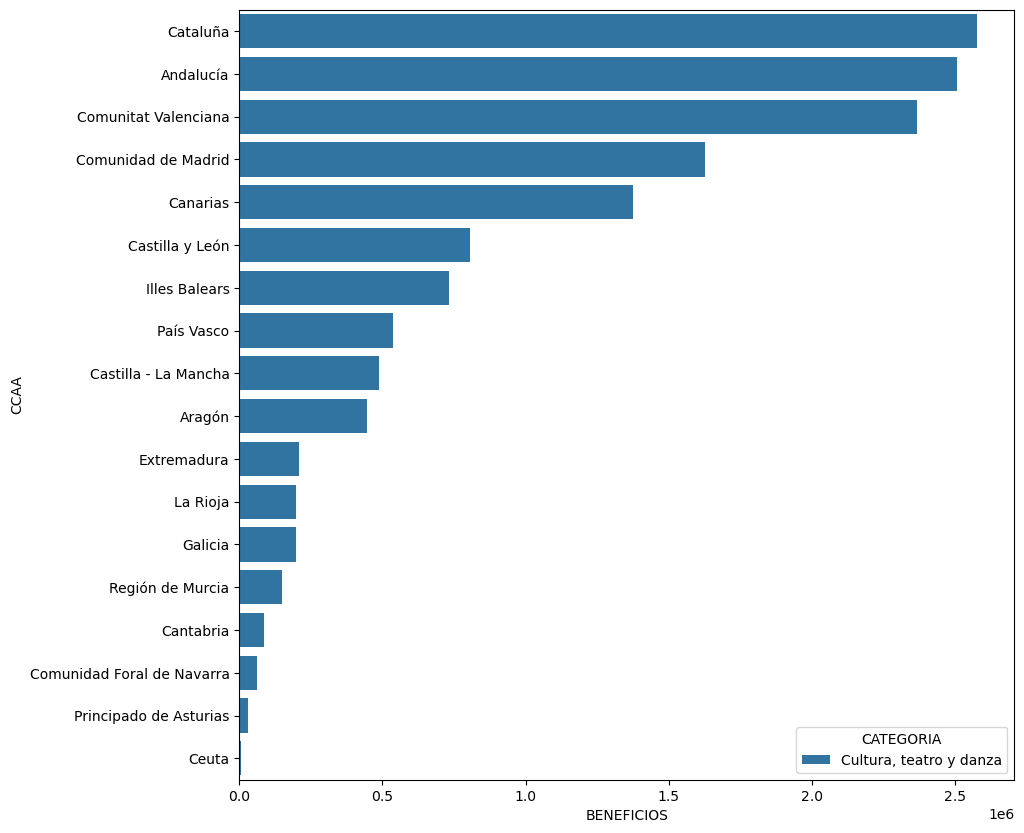

In [26]:
df_cultura = df_AOD[df_AOD["CATEGORIA"] == "Cultura, teatro y danza"]
fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = "BENEFICIOS", y = "CCAA", hue = "CATEGORIA", data = df_cultura)

plt.show()

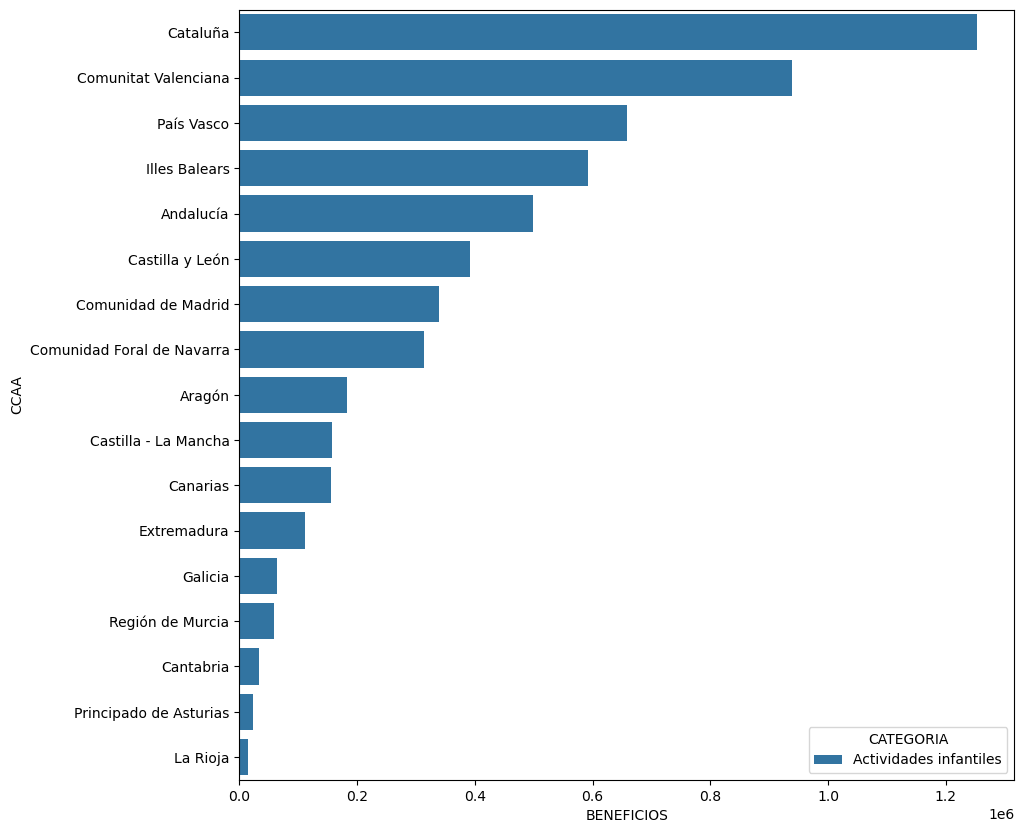

In [27]:
df_infantiles = df_AOD[df_AOD["CATEGORIA"] == "Actividades infantiles"]
fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = "BENEFICIOS", y = "CCAA", hue = "CATEGORIA", data = df_infantiles)

plt.show()

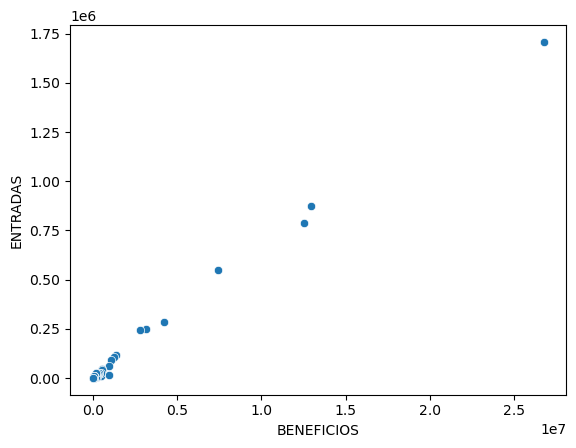

In [40]:
sns.scatterplot(x = df_AOD["BENEFICIOS"], y = df_AOD["ENTRADAS"])
plt.show()

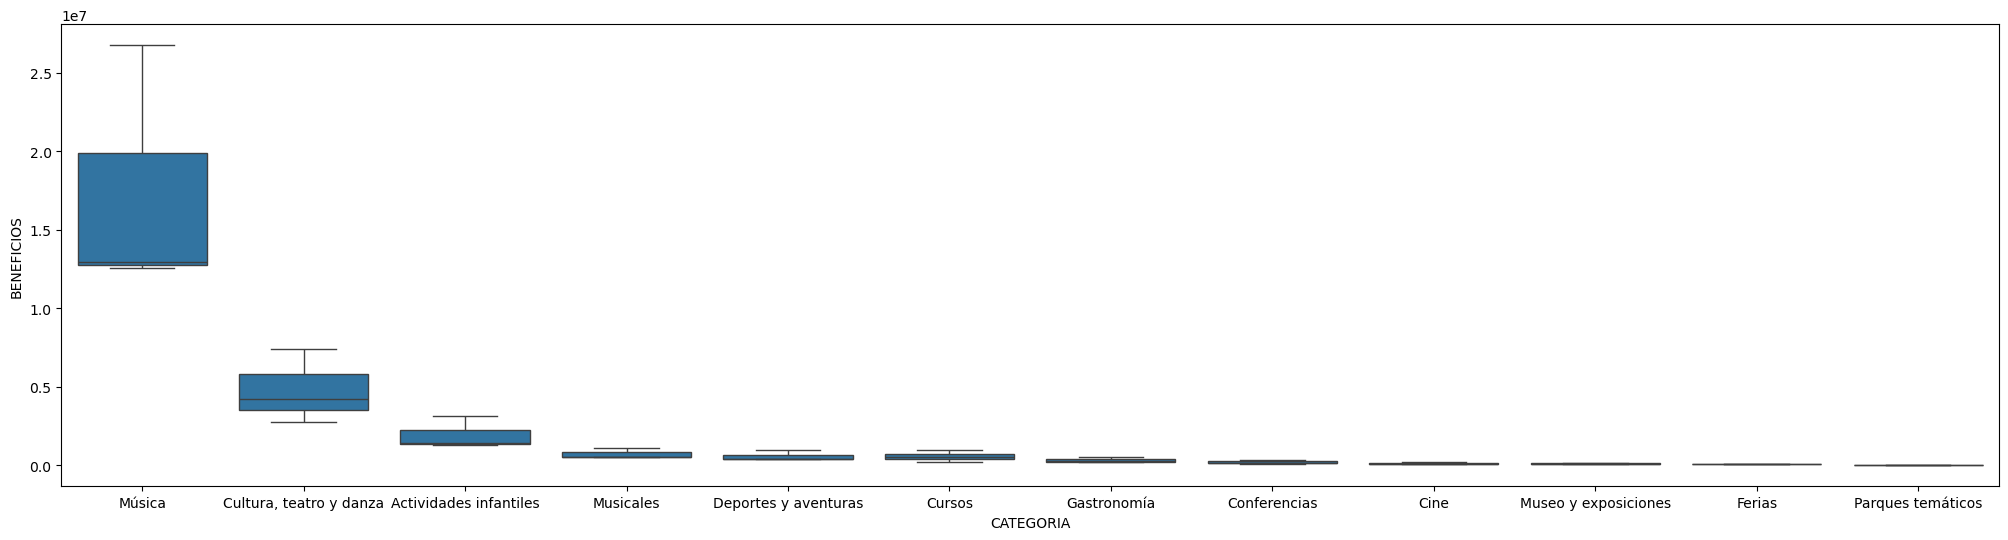

In [30]:
fig, ax = plt.subplots(figsize = (25, 6))
sns.boxplot(x = df_AOD["CATEGORIA"],
            y = df_AOD["BENEFICIOS"])

plt.show()

Aqui se destacan las tres primeras actividades de ocio en Espana. La musica llega primera tanto en terminos de beneficios que en terminos de 

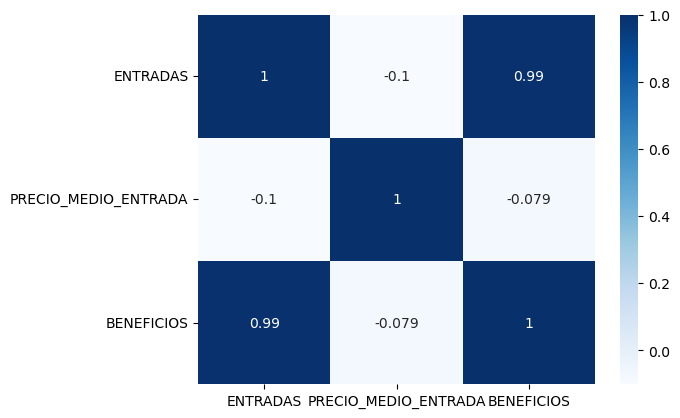

In [14]:
sns.heatmap(data = df_AOD._get_numeric_data().corr(),
            annot = True,
            cmap = "Blues")
plt.show()

Aqui podemos ver que hay una corelacion entre las entradas y lmos beneficios : efectivamente cuantas mas entras estan vendidas mas beneficios habra. 
Sin embargo, algo interesante que se destaca aqui es que si el precio medio de las entradas aumenta, entonces hay una diminucion del numero de entradas que se repercuta en los beneficios tambien. 


In [41]:
df_AOD

,AÑO,CATEGORIA,ENTRADAS,PRECIO_MEDIO_ENTRADA,BENEFICIOS
22,2024,Música,1707364,16.338337,2.675584e+07
34,2025,Música,871762,17.529230,1.297150e+07
10,2023,Música,787960,16.865917,1.254834e+07
15,2024,"Cultura, teatro y danza",548996,12.931045,7.401212e+06
27,2025,"Cultura, teatro y danza",282275,13.440778,4.212688e+06
12,2024,Actividades infantiles,250134,14.687921,3.131946e+06
3,2023,"Cultura, teatro y danza",244629,12.263704,2.786385e+06
0,2023,Actividades infantiles,115228,17.405918,1.389127e+06
24,2025,Actividades infantiles,109321,17.169012,1.266638e+06
21,2024,Musicales,90411,12.011725,1.092596e+06
